In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)
import requests

In [26]:
import time
url = 'https://fbref.com/en/squads/'
covidYear = '/2020-2021'
nonCovidYear = '/2021-2022'

teams = {
    'Man-United': '19538871',
    'Man-City': 'b8fd03ef',
    'Arsenal': '18bb7c10',
    'Newcastle': 'b2b47a98',
    'Liverpool': '822bd0ba',
    'Tottenham': '361ca564',
    'Chelsea': 'cff3d9bb',
    'Leicester-City': 'a2d435b3',
    'Wolves': '8cec06e1',
    'Leeds-United': '5bfb9659',
    'Burnley': '943e8050',
    'Southampton': '33c895d4',
    'Everton': 'd3fd31cc',
    'Crystal-Palace': '47c64c55',
    'Brighton': 'd07537b9',
    'West-Ham': '7c21e445',
    'Aston-Villa': '8602292d'
}

covidData = pd.DataFrame()
nonCovidData = pd.DataFrame()

#Sleep has been added because requesting from the same website constantly bloqued the GET requests due to "exceeding the MAX retries
for team in teams:
    covidResponse = requests.get(url + teams[team] + covidYear)
    NonCovidResponse = requests.get(url + teams[team] + nonCovidYear)
    try:
        # Read HTML file and extract tables
        tables = pd.read_html(covidResponse.content)

        # Assuming you want the first table, you can access it like this
        if tables:
            table_df = tables[1]
            table_df['Team'] = team
            covidData = pd.concat([covidData, table_df], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
            
        tables = pd.read_html(NonCovidResponse.content)

        # Assuming you want the first table, you can access it like this
        if tables:
            table_df = tables[1]
            table_df['Team'] = team
            nonCovidData = pd.concat([nonCovidData, table_df], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
    
        time.sleep(5)
    

    except Exception as e:
        print(f"Error: {e}")

covidData = covidData[covidData['Comp'] == 'Premier League']
nonCovidData = nonCovidData[nonCovidData['Comp'] == 'Premier League']


display(covidData)
display(nonCovidData)




,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2020-09-19,17:30,Premier League,Matchweek 2,Sat,Home,L,1,3,Crystal Palace,1.2,1.6,75.0,NaN,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
2,2020-09-26,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Brighton,1.5,2.5,47.0,NaN,Harry Maguire,4-2-3-1,Chris Kavanagh,Match Report,NaN,Man-United
4,2020-10-04,16:30,Premier League,Matchweek 4,Sun,Home,L,1,6,Tottenham,0.9,3.4,39.0,NaN,Harry Maguire,4-2-3-1,Anthony Taylor,Match Report,NaN,Man-United
5,2020-10-17,20:00,Premier League,Matchweek 5,Sat,Away,W,4,1,Newcastle Utd,2.3,0.9,63.0,NaN,Harry Maguire,4-2-3-1,Craig Pawson,Match Report,NaN,Man-United
7,2020-10-24,17:30,Premier League,Matchweek 6,Sat,Home,D,0,0,Chelsea,0.6,0.2,51.0,NaN,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2021-05-09,14:05,Premier League,Matchweek 35,Sun,Home,L,1,3,Manchester Utd,0.5,1.7,41.0,NaN,Tyrone Mings,4-2-3-1,Chris Kavanagh,Match Report,NaN,Aston-Villa
829,2021-05-13,18:00,Premier League,Matchweek 19,Thu,Home,D,0,0,Everton,0.6,1.0,58.0,NaN,Tyrone Mings,4-2-3-1,Martin Atkinson,Match Report,NaN,Aston-Villa
830,2021-05-16,12:00,Premier League,Matchweek 36,Sun,Away,L,2,3,Crystal Palace,1.4,1.9,55.0,NaN,John McGinn,4-3-3,David Coote,Match Report,NaN,Aston-Villa
831,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,W,2,1,Tottenham,1.4,0.8,40.0,10000.0,Jack Grealish,4-2-3-1,Craig Pawson,Match Report,NaN,Aston-Villa


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5,1,Leeds United,1.5,0.5,49.0,72732.0,Harry Maguire,4-2-3-1,Paul Tierney,Match Report,NaN,Man-United
1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1,1,Southampton,1.8,0.7,63.0,32000.0,Harry Maguire,4-2-3-1,Craig Pawson,Match Report,NaN,Man-United
2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1,0,Wolves,0.6,2.1,56.0,30621.0,Harry Maguire,4-2-3-1,Mike Dean,Match Report,NaN,Man-United
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4,1,Newcastle Utd,2.5,0.4,63.0,72732.0,Harry Maguire,4-2-3-1,Anthony Taylor,Match Report,NaN,Man-United
5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2,1,West Ham,2.0,1.6,60.0,60000.0,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2022-05-07,15:00,Premier League,Matchweek 36,Sat,Away,W,3,1,Burnley,2.1,1.9,51.0,20891.0,Tyrone Mings,4-1-2-1-2◆,David Coote,Match Report,NaN,Aston-Villa
823,2022-05-10,20:00,Premier League,Matchweek 33,Tue,Home,L,1,2,Liverpool,1.4,1.8,40.0,41919.0,Tyrone Mings,4-3-1-2,Jonathan Moss,Match Report,NaN,Aston-Villa
824,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Home,D,1,1,Crystal Palace,1.0,1.4,49.0,41136.0,Tyrone Mings,4-3-1-2,Chris Kavanagh,Match Report,NaN,Aston-Villa
825,2022-05-19,20:00,Premier League,Matchweek 18,Thu,Home,D,1,1,Burnley,1.5,1.6,71.0,40468.0,Tyrone Mings,4-3-2-1,Paul Tierney,Match Report,NaN,Aston-Villa


hello;  Team
Arsenal           24
Aston-Villa       29
Brighton          22
Burnley           14
Chelsea           31
Crystal-Palace    20
Everton           24
Leeds-United      28
Leicester-City    34
Liverpool         29
Man-City          43
Man-United        38
Newcastle         26
Southampton       28
Tottenham         35
West-Ham          32
Wolves            21
Name: GF, dtype: int64    Team
Arsenal           35
Aston-Villa       29
Brighton          19
Burnley           18
Chelsea           37
Crystal-Palace    27
Everton           27
Leeds-United      19
Leicester-City    34
Liverpool         49
Man-City          58
Man-United        32
Newcastle         26
Southampton       23
Tottenham         38
West-Ham          33
Wolves            20
Name: GF, dtype: int64


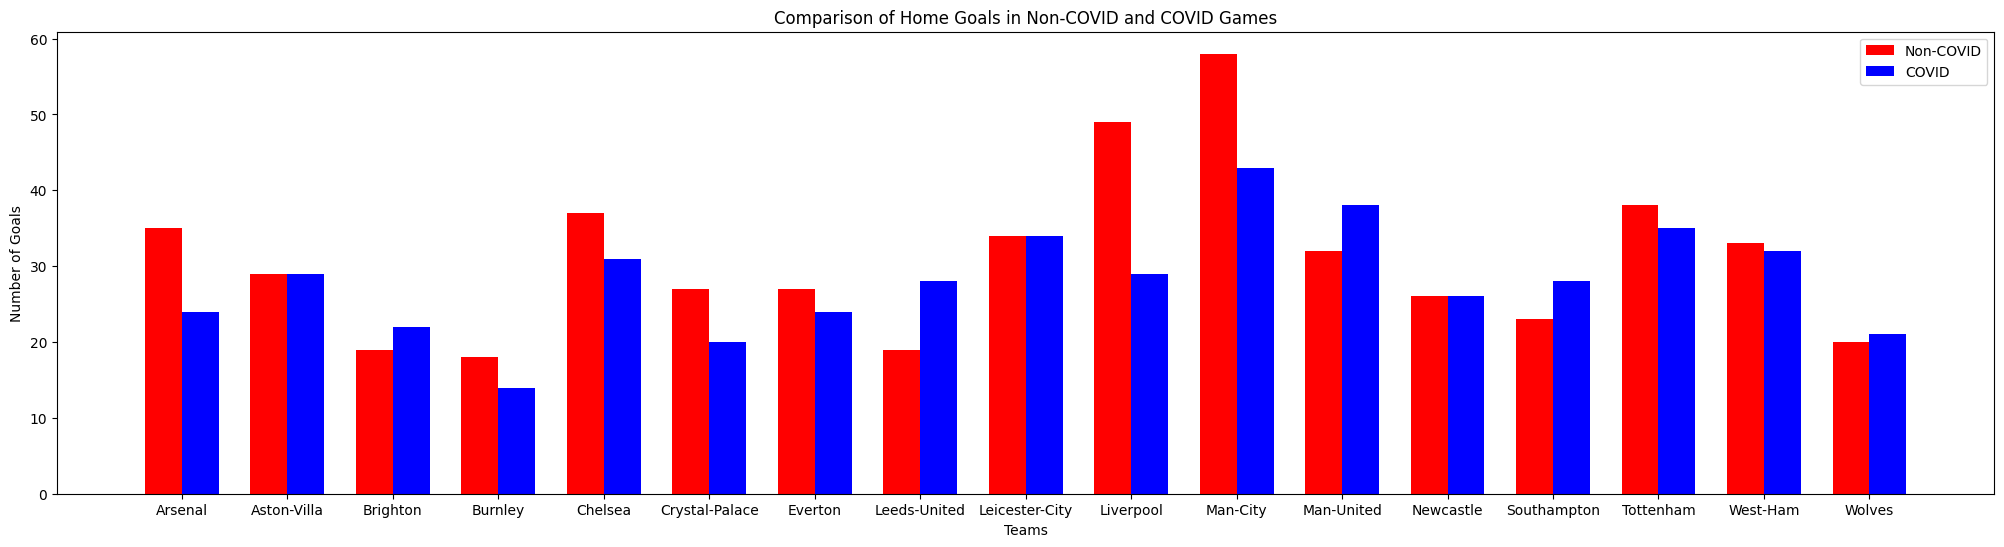

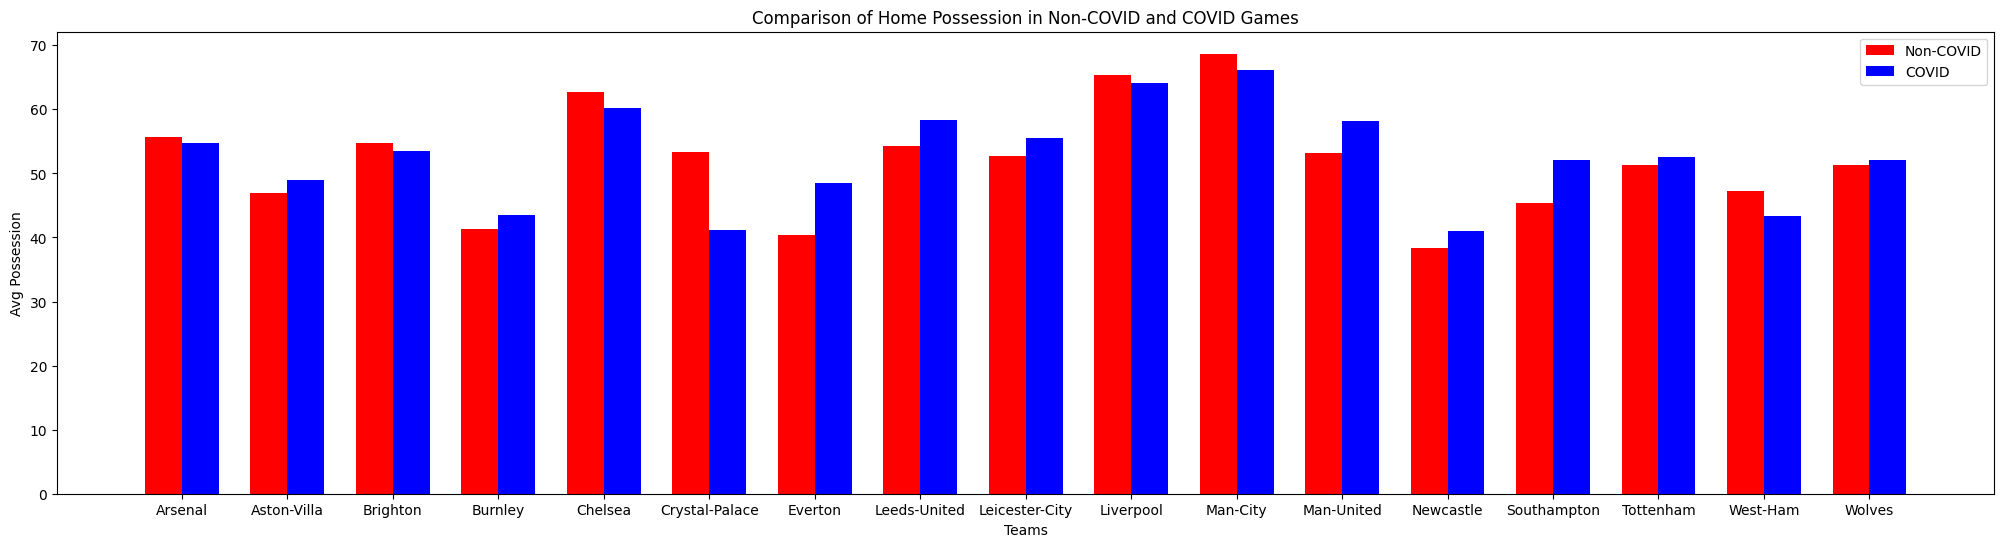

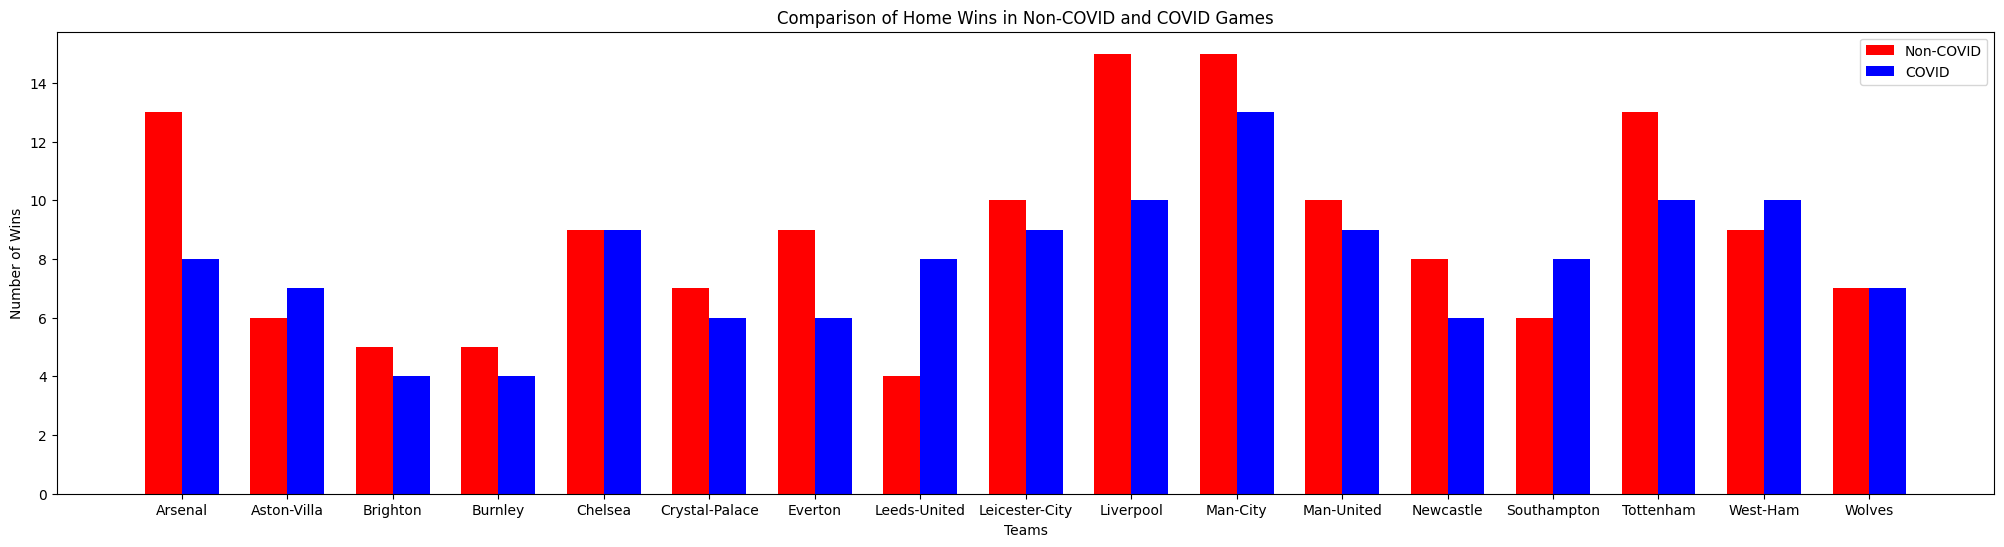

In [27]:
covidData['GF'] = pd.to_numeric(covidData['GF'], errors='coerce')
nonCovidData['GF'] = pd.to_numeric(nonCovidData['GF'], errors='coerce')

covidData['Poss'] = pd.to_numeric(covidData['Poss'], errors='coerce')
nonCovidData['Poss'] = pd.to_numeric(nonCovidData['Poss'], errors='coerce')

covidData['Result'] = covidData['Result'].astype(str)  # Ensure 'Result' is a string to handle potential data types
nonCovidData['Result'] = nonCovidData['Result'].astype(str)

covidHomeData = covidData[covidData['Venue'] == 'Home']
nonCovidHomeData = nonCovidData[nonCovidData['Venue'] == 'Home']

covid_goals_by_team = covidHomeData.groupby('Team')['GF'].sum()
non_covid_goals_by_team = nonCovidHomeData.groupby('Team')['GF'].sum()

print("hello; ",covid_goals_by_team, "  ", non_covid_goals_by_team)

# Create a DataFrame for plotting
df_goals = pd.DataFrame({
    'Team': covid_goals_by_team.index,
    'COVID Goals': covid_goals_by_team,
    'Non-COVID Goals': non_covid_goals_by_team
})

#Goal comparisson
plt.figure(figsize=(25, 6))
bar_width = 0.35
index = range(len(df_goals))

bar1 = plt.bar(index, df_goals['Non-COVID Goals'], bar_width, label='Non-COVID', color='red')
bar2 = plt.bar([i + bar_width for i in index], df_goals['COVID Goals'], bar_width, label='COVID', color='blue')

plt.xlabel('Teams')
plt.ylabel('Number of Goals')
plt.title('Comparison of Home Goals in Non-COVID and COVID Games')
plt.xticks([i + bar_width / 2 for i in index], df_goals['Team'])
plt.legend()


covid_poss_by_team = covidHomeData.groupby('Team')['Poss'].mean()
non_covid_poss_by_team = nonCovidHomeData.groupby('Team')['Poss'].mean()

# Create a DataFrame for plotting
df_goals = pd.DataFrame({
    'Team': covid_goals_by_team.index,
    'COVID Avg Possession': covid_poss_by_team,
    'Non-COVID Avg Possession': non_covid_poss_by_team
})


#Possession Comparison
plt.figure(figsize=(25, 6))
bar_width = 0.35
index = range(len(df_goals))

bar1 = plt.bar(index, df_goals['Non-COVID Avg Possession'], bar_width, label='Non-COVID', color='red')
bar2 = plt.bar([i + bar_width for i in index], df_goals['COVID Avg Possession'], bar_width, label='COVID', color='blue')

plt.xlabel('Teams')
plt.ylabel('Avg Possession')
plt.title('Comparison of Home Possession in Non-COVID and COVID Games')
plt.xticks([i + bar_width / 2 for i in index], df_goals['Team'])
plt.legend()


#Wins Comparisson
covid_wins_by_team = covidHomeData[covidHomeData['Result'] == 'W'].groupby('Team').size()
non_covid_wins_by_team = nonCovidHomeData[nonCovidHomeData['Result'] == 'W'].groupby('Team').size()

df_wins = pd.DataFrame({
    'Team': covid_wins_by_team.index,
    'COVID Wins': covid_wins_by_team.values,
    'Non-COVID Wins': non_covid_wins_by_team.values
})

plt.figure(figsize=(25, 6))
bar_width = 0.35
index = range(len(df_wins))

bar1 = plt.bar(index, df_wins['Non-COVID Wins'], bar_width, label='Non-COVID', color='red')
bar2 = plt.bar([i + bar_width for i in index], df_wins['COVID Wins'], bar_width, label='COVID', color='blue')

plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Comparison of Home Wins in Non-COVID and COVID Games')
plt.xticks([i + bar_width / 2 for i in index], df_wins['Team'])
plt.legend()

plt.show()


In [28]:
goalRatio = pd.DataFrame({
    'Team': covid_goals_by_team.index,
    'COVID Goals': covid_goals_by_team,
    'Non-COVID Goals': non_covid_goals_by_team,
    'Goal Ratio Non-Covid/Covid': (non_covid_goals_by_team / covid_goals_by_team)
})

possessionRatio = pd.DataFrame({
    'Team': covid_poss_by_team.index,
    'COVID Possession': covid_poss_by_team,
    'Non-COVID Possession': non_covid_poss_by_team,
    'Possession Ratio Non-Covid/Covid': (non_covid_poss_by_team / covid_poss_by_team)
})

# Create a DataFrame for wins ratio
winsRatio = pd.DataFrame({
    'Team': covid_wins_by_team.index,
    'COVID Wins': covid_wins_by_team.values,
    'Non-COVID Wins': non_covid_wins_by_team.values,
    'Wins Ratio Non-Covid/Covid': (non_covid_wins_by_team / covid_wins_by_team)
})

# Ratio should be more than 1 if Non covid games gives an Advantage

display(goalRatio)
display(possessionRatio)
display(winsRatio)

meanPossessionRatio = possessionRatio['Possession Ratio Non-Covid/Covid'].mean()
meanWinsRatio = winsRatio['Wins Ratio Non-Covid/Covid'].mean()
meanGoalRatio = goalRatio['Goal Ratio Non-Covid/Covid'].mean()

print("Mean Possession Ratio:", meanPossessionRatio)
print("Mean Wins Ratio:", meanWinsRatio)
print("Mean Goal Ratio:", meanGoalRatio)




,Team,COVID Goals,Non-COVID Goals,Goal Ratio Non-Covid/Covid
Team,,,,
Arsenal,Arsenal,24,35,1.458333
Aston-Villa,Aston-Villa,29,29,1.000000
Brighton,Brighton,22,19,0.863636
Burnley,Burnley,14,18,1.285714
Chelsea,Chelsea,31,37,1.193548
Crystal-Palace,Crystal-Palace,20,27,1.350000
Everton,Everton,24,27,1.125000
Leeds-United,Leeds-United,28,19,0.678571
Leicester-City,Leicester-City,34,34,1.000000


,Team,COVID Possession,Non-COVID Possession,Possession Ratio Non-Covid/Covid
Team,,,,
Arsenal,Arsenal,54.736842,55.631579,1.016346
Aston-Villa,Aston-Villa,49.000000,46.894737,0.957035
Brighton,Brighton,53.526316,54.684211,1.021632
Burnley,Burnley,43.578947,41.263158,0.946860
Chelsea,Chelsea,60.210526,62.736842,1.041958
Crystal-Palace,Crystal-Palace,41.105263,53.421053,1.299616
Everton,Everton,48.473684,40.368421,0.832790
Leeds-United,Leeds-United,58.315789,54.210526,0.929603
Leicester-City,Leicester-City,55.578947,52.684211,0.947917


,Team,COVID Wins,Non-COVID Wins,Wins Ratio Non-Covid/Covid
Team,,,,
Arsenal,Arsenal,8,13,1.625000
Aston-Villa,Aston-Villa,7,6,0.857143
Brighton,Brighton,4,5,1.250000
Burnley,Burnley,4,5,1.250000
Chelsea,Chelsea,9,9,1.000000
Crystal-Palace,Crystal-Palace,6,7,1.166667
Everton,Everton,6,9,1.500000
Leeds-United,Leeds-United,8,4,0.500000
Leicester-City,Leicester-City,9,10,1.111111


Mean Possession Ratio: 0.9898195040771623
Mean Wins Ratio: 1.1357771313653666
Mean Goal Ratio: 1.1015397207500004


In [36]:
url = 'https://fbref.com/en/comps/'
covidYear = '/2020-2021'
nonCovidYear = '/2021-2022'


responseCovid = requests.get(url + '9' + covidYear)
teamGamesTableCovid = pd.read_html(responseCovid.content)
teamGamesTableCovid = teamGamesTableCovid[22]
#display(teamGamesTableCovid)


teamGamesTableCovid[('Performance', 'CrdY')] = pd.to_numeric(teamGamesTableCovid[('Performance', 'CrdY')], errors='coerce')
teamGamesTableCovid[('Performance', 'CrdR')] = pd.to_numeric(teamGamesTableCovid[('Performance', 'CrdR')], errors='coerce')
teamGamesTableCovid[('Performance', '2CrdY')] = pd.to_numeric(teamGamesTableCovid[('Performance', '2CrdY')], errors='coerce')

yellowCovid = teamGamesTableCovid[('Performance', 'CrdY')].sum()
redCovid = teamGamesTableCovid[('Performance', 'CrdR')].sum()
twoYellowCovid = teamGamesTableCovid[('Performance', '2CrdY')].sum()

total = redCovid + yellowCovid + twoYellowCovid
print("Total number of cards in Covid season:", total)



responseNonCovid = requests.get(url + '9' + nonCovidYear)
teamGamesTableNonCovid = pd.read_html(responseNonCovid.content)
teamGamesTableNonCovid = teamGamesTableNonCovid[22]
#display(teamGamesTableNonCovid)

teamGamesTableNonCovid[('Performance', 'CrdY')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', 'CrdY')], errors='coerce')
teamGamesTableNonCovid[('Performance', 'CrdR')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', 'CrdR')], errors='coerce')
teamGamesTableNonCovid[('Performance', '2CrdY')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', '2CrdY')], errors='coerce')

yellowNonCovid = teamGamesTableNonCovid[('Performance', 'CrdY')].sum()
redNonCovid = teamGamesTableNonCovid[('Performance', 'CrdR')].sum()
twoYellowNonCovid = teamGamesTableNonCovid[('Performance', '2CrdY')].sum()

totalNonCovid = redNonCovid + yellowNonCovid + twoYellowNonCovid
print("Total number of cards in Non-COVID season:", totalNonCovid)



Total number of cards in Covid season: 1188
Total number of cards in Non-COVID season: 1405


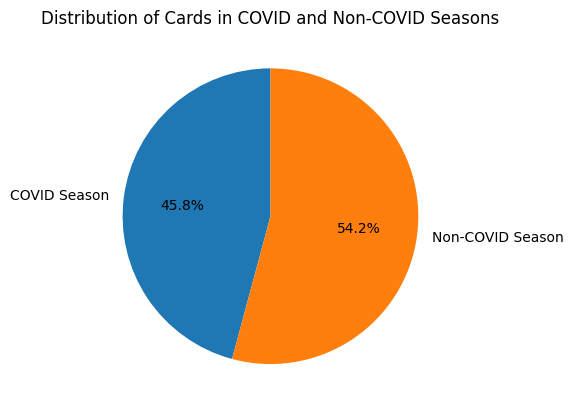

In [37]:
# Data for the pie chart
labels = ['COVID Season', 'Non-COVID Season']
total_cards = [total, totalNonCovid]

# Create a pie chart
plt.pie(total_cards, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Cards in COVID and Non-COVID Seasons')

# Display the pie chart
plt.show()

In [35]:
import time

url = 'https://fbref.com/en/comps/'
covidYear = '/2020-2021'
nonCovidYear = '/2021-2022'

competitions = {
    'Premier-League': '9',
    'La-Liga': '12',
    'Serie-A': '11',
    'Bundesliga': '20',
    'Ligue-1': '13',
}

covidData = pd.DataFrame()
nonCovidData = pd.DataFrame()

for competition in competitions:
    responseCovid = requests.get(url + competitions[competition] + covidYear)
    responseNonCovid = requests.get(url + competitions[competition] + nonCovidYear)
    
    try:
        
        table = pd.read_html(responseCovid.content)
        
        if table:
            teamGamesTableCovid = table[22]
            teamGamesTableCovid['Competition'] = competition 
            covidData = pd.concat([covidData, teamGamesTableCovid], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
        
        table = pd.read_html(responseNonCovid.content)
        
        if table:
            teamGamesTableNonCovid = table[22]
            teamGamesTableNonCovid['Competition'] = competition 
            nonCovidData = pd.concat([nonCovidData, teamGamesTableNonCovid], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
        time.sleep(5)
    

    except Exception as e:
        print(f"Error: {e}")
    
display(covidData)
display(nonCovidData)



Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Performance       \
                Squad               # Pl                90s        CrdY CrdR   
0             Arsenal                 29               38.0          49    5   
1         Aston Villa                 24               38.0          71    4   
2            Brighton                 27               38.0          49    6   
3             Burnley                 25               38.0          48    0   
4             Chelsea                 27               38.0          51    3   
..                ...                ...                ...         ...  ...   
93          Paris S-G                 33               38.0          79    7   
94              Reims                 29               38.0          77    8   
95             Rennes                 32               38.0          79    5   
96      Saint-Étienne                 40               38.0          76    2   
97         Strasbourg                 26               38.0          58    3   

                                                           Aerial Duels       \
   2CrdY  Fls  Fld Off  Crs  Int TklW PKwon PKcon OG Recov          Won Lost   
0      1  346  400  61  751  351  252     5     3  4  1838          504  594   
1      4  439  553  71  779  387  282     6     6  1  1906          728  665   
2      2  428  357  52  686  425  334     7     7  2  2040          531  574   
3      0  384  389  80  772  416  293     3     3  1  2000          874  854   
4      1  433  364  79  749  382  341    10     4  1  1999          569  515   
..   ...  ...  ...  ..  ...  ...  ...   ...   ... ..   ...          ...  ...   
93     3  463  431  65  695  373  385    11     2  1  2052          355  300   
94     1  442  414  61  539  487  372     3     8  1  1936          494  578   
95     0  502  486  34  764  361  337     3     4  1  2003          627  554   
96     0  529  490  49  779  471  428     5     9  2  2119          612  624   
97     1  499  412  39  713  521  396     7     8  1  2036          691  658   

             Competition  
    Won%                  
0   45.9  Premier-League  
1   52.3  Premier-League  
2   48.1  Premier-League  
3   50.6  Premier-League  
4   52.5  Premier-League  
..   ...             ...  
93  54.2         Ligue-1  
94  46.1         Ligue-1  
95  53.1         Ligue-1  
96  49.5         Ligue-1  
97  51.2         Ligue-1  

[98 rows x 20 columns]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Performance       \
                Squad               # Pl                90s        CrdY CrdR   
0             Arsenal                 27               38.0          67    4   
1         Aston Villa                 31               38.0          81    2   
2           Brentford                 29               38.0          65    3   
3            Brighton                 26               38.0          72    2   
4             Burnley                 23               38.0          68    2   
..                ...                ...                ...         ...  ...   
93              Reims                 35               38.0          68    7   
94             Rennes                 28               38.0          56    2   
95      Saint-Étienne                 39               38.0          81    5   
96         Strasbourg                 26               38.0          72    3   
97             Troyes                 35               38.0          75    6   

                                                            Aerial Duels       \
   2CrdY  Fls  Fld  Off  Crs  Int TklW PKwon PKcon OG Recov          Won Lost   
0      3  365  357   66  633  296  311     6     6  1  1861          463  572   
1      1  401  504   52  670  339  382     2     6  2  1850          538  561   
2      2  371  363   66  640  393  342     6     5  2  2061          717  728   
3      0  393  355   53  728  358  403     4     4  0  2154          569  498   
4      0  394  332  101  747  410  324     2     5  2  2027          827  733   
..   ...  ...  ...  ...  ...  ...  ...   ...   ... ..   ...          ...  ...   
93     4  449  451   76  629  493  365     5     7  0  2074          453  495   
94     1  434  377   59  698  315  318     4     6  1  1904          547  534   
95     1  464  441   51  697  452  397     4     8  4  2152          463  611   
96     1  497  400   61  797  433  392     6     4  1  2092          654  521   
97     3  442  473   53  708  430  351     7    10  2  1987          417  460   

             Competition  
    Won%                  
0   44.7  Premier-League  
1   49.0  Premier-League  
2   49.6  Premier-League  
3   53.3  Premier-League  
4   53.0  Premier-League  
..   ...             ...  
93  47.8         Ligue-1  
94  50.6         Ligue-1  
95  43.1         Ligue-1  
96  55.7         Ligue-1  
97  47.5         Ligue-1  

[98 rows x 20 columns]

Total number of cards in Covid season: 7537
Total number of cards in Non-COVID season: 8190


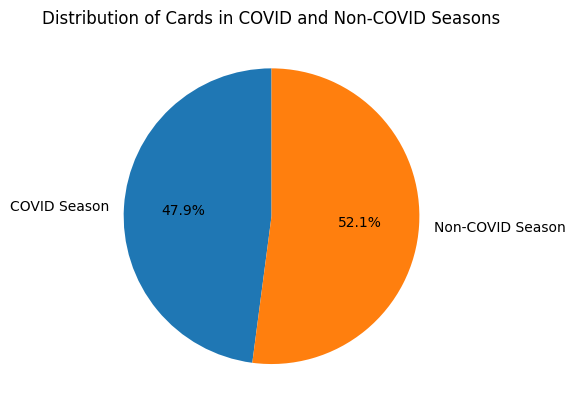

In [38]:
teamGamesTableCovid = covidData
teamGamesTableNonCovid = nonCovidData


teamGamesTableCovid[('Performance', 'CrdY')] = pd.to_numeric(teamGamesTableCovid[('Performance', 'CrdY')], errors='coerce')
teamGamesTableCovid[('Performance', 'CrdR')] = pd.to_numeric(teamGamesTableCovid[('Performance', 'CrdR')], errors='coerce')
teamGamesTableCovid[('Performance', '2CrdY')] = pd.to_numeric(teamGamesTableCovid[('Performance', '2CrdY')], errors='coerce')

yellowCovid = teamGamesTableCovid[('Performance', 'CrdY')].sum()
redCovid = teamGamesTableCovid[('Performance', 'CrdR')].sum()
twoYellowCovid = teamGamesTableCovid[('Performance', '2CrdY')].sum()

total = redCovid + yellowCovid + twoYellowCovid
print("Total number of cards in Covid season:", total)


teamGamesTableNonCovid[('Performance', 'CrdY')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', 'CrdY')], errors='coerce')
teamGamesTableNonCovid[('Performance', 'CrdR')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', 'CrdR')], errors='coerce')
teamGamesTableNonCovid[('Performance', '2CrdY')] = pd.to_numeric(teamGamesTableNonCovid[('Performance', '2CrdY')], errors='coerce')

yellowNonCovid = teamGamesTableNonCovid[('Performance', 'CrdY')].sum()
redNonCovid = teamGamesTableNonCovid[('Performance', 'CrdR')].sum()
twoYellowNonCovid = teamGamesTableNonCovid[('Performance', '2CrdY')].sum()

totalNonCovid = redNonCovid + yellowNonCovid + twoYellowNonCovid
print("Total number of cards in Non-COVID season:", totalNonCovid)


# Data for the pie chart
labels = ['COVID Season', 'Non-COVID Season']
total_cards = [total, totalNonCovid]

# Create a pie chart
plt.pie(total_cards, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Cards in COVID and Non-COVID Seasons')

# Display the pie chart
plt.show()

In [39]:
import time
url = 'https://fbref.com/en/squads/'
covidYear = '/2020-2021'
nonCovidYear = '/2021-2022'

teams = {
    'Man-United': '19538871',
    'Man-City': 'b8fd03ef',
    'Arsenal': '18bb7c10',
    'Newcastle': 'b2b47a98',
    'Liverpool': '822bd0ba',
    'Tottenham': '361ca564',
    'Chelsea': 'cff3d9bb',
    'Leicester-City': 'a2d435b3',
    'Wolves': '8cec06e1',
    'Leeds-United': '5bfb9659',
    'Burnley': '943e8050',
    'Southampton': '33c895d4',
    'Everton': 'd3fd31cc',
    'Crystal-Palace': '47c64c55',
    'Brighton': 'd07537b9',
    'West-Ham': '7c21e445',
    'Aston-Villa': '8602292d'
}

covidData = pd.DataFrame()
nonCovidData = pd.DataFrame()

#Sleep has been added because requesting from the same website constantly bloqued the GET requests due to "exceeding the MAX retries
for team in teams:
    covidResponse = requests.get(url + teams[team] + covidYear)
    NonCovidResponse = requests.get(url + teams[team] + nonCovidYear)
    try:
        # Read HTML file and extract tables
        tables = pd.read_html(covidResponse.content)

        # Assuming you want the first table, you can access it like this
        if tables:
            table_df = tables[1]
            table_df['Team'] = team
            covidData = pd.concat([covidData, table_df], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
            
        tables = pd.read_html(NonCovidResponse.content)

        # Assuming you want the first table, you can access it like this
        if tables:
            table_df = tables[1]
            table_df['Team'] = team
            nonCovidData = pd.concat([nonCovidData, table_df], ignore_index=True)
        else:
            print("No tables found in the HTML file.")
    
        time.sleep(5)
    

    except Exception as e:
        print(f"Error: {e}")

covidData = covidData[covidData['Comp'] == 'Premier League']
nonCovidData = nonCovidData[nonCovidData['Comp'] == 'Premier League']


display(covidData)
display(nonCovidData)




,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2020-09-19,17:30,Premier League,Matchweek 2,Sat,Home,L,1,3,Crystal Palace,1.2,1.6,75.0,NaN,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
2,2020-09-26,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Brighton,1.5,2.5,47.0,NaN,Harry Maguire,4-2-3-1,Chris Kavanagh,Match Report,NaN,Man-United
4,2020-10-04,16:30,Premier League,Matchweek 4,Sun,Home,L,1,6,Tottenham,0.9,3.4,39.0,NaN,Harry Maguire,4-2-3-1,Anthony Taylor,Match Report,NaN,Man-United
5,2020-10-17,20:00,Premier League,Matchweek 5,Sat,Away,W,4,1,Newcastle Utd,2.3,0.9,63.0,NaN,Harry Maguire,4-2-3-1,Craig Pawson,Match Report,NaN,Man-United
7,2020-10-24,17:30,Premier League,Matchweek 6,Sat,Home,D,0,0,Chelsea,0.6,0.2,51.0,NaN,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2021-05-09,14:05,Premier League,Matchweek 35,Sun,Home,L,1,3,Manchester Utd,0.5,1.7,41.0,NaN,Tyrone Mings,4-2-3-1,Chris Kavanagh,Match Report,NaN,Aston-Villa
829,2021-05-13,18:00,Premier League,Matchweek 19,Thu,Home,D,0,0,Everton,0.6,1.0,58.0,NaN,Tyrone Mings,4-2-3-1,Martin Atkinson,Match Report,NaN,Aston-Villa
830,2021-05-16,12:00,Premier League,Matchweek 36,Sun,Away,L,2,3,Crystal Palace,1.4,1.9,55.0,NaN,John McGinn,4-3-3,David Coote,Match Report,NaN,Aston-Villa
831,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,W,2,1,Tottenham,1.4,0.8,40.0,10000.0,Jack Grealish,4-2-3-1,Craig Pawson,Match Report,NaN,Aston-Villa


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5,1,Leeds United,1.5,0.5,49.0,72732.0,Harry Maguire,4-2-3-1,Paul Tierney,Match Report,NaN,Man-United
1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1,1,Southampton,1.8,0.7,63.0,32000.0,Harry Maguire,4-2-3-1,Craig Pawson,Match Report,NaN,Man-United
2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1,0,Wolves,0.6,2.1,56.0,30621.0,Harry Maguire,4-2-3-1,Mike Dean,Match Report,NaN,Man-United
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4,1,Newcastle Utd,2.5,0.4,63.0,72732.0,Harry Maguire,4-2-3-1,Anthony Taylor,Match Report,NaN,Man-United
5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2,1,West Ham,2.0,1.6,60.0,60000.0,Harry Maguire,4-2-3-1,Martin Atkinson,Match Report,NaN,Man-United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2022-05-07,15:00,Premier League,Matchweek 36,Sat,Away,W,3,1,Burnley,2.1,1.9,51.0,20891.0,Tyrone Mings,4-1-2-1-2◆,David Coote,Match Report,NaN,Aston-Villa
823,2022-05-10,20:00,Premier League,Matchweek 33,Tue,Home,L,1,2,Liverpool,1.4,1.8,40.0,41919.0,Tyrone Mings,4-3-1-2,Jonathan Moss,Match Report,NaN,Aston-Villa
824,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Home,D,1,1,Crystal Palace,1.0,1.4,49.0,41136.0,Tyrone Mings,4-3-1-2,Chris Kavanagh,Match Report,NaN,Aston-Villa
825,2022-05-19,20:00,Premier League,Matchweek 18,Thu,Home,D,1,1,Burnley,1.5,1.6,71.0,40468.0,Tyrone Mings,4-3-2-1,Paul Tierney,Match Report,NaN,Aston-Villa


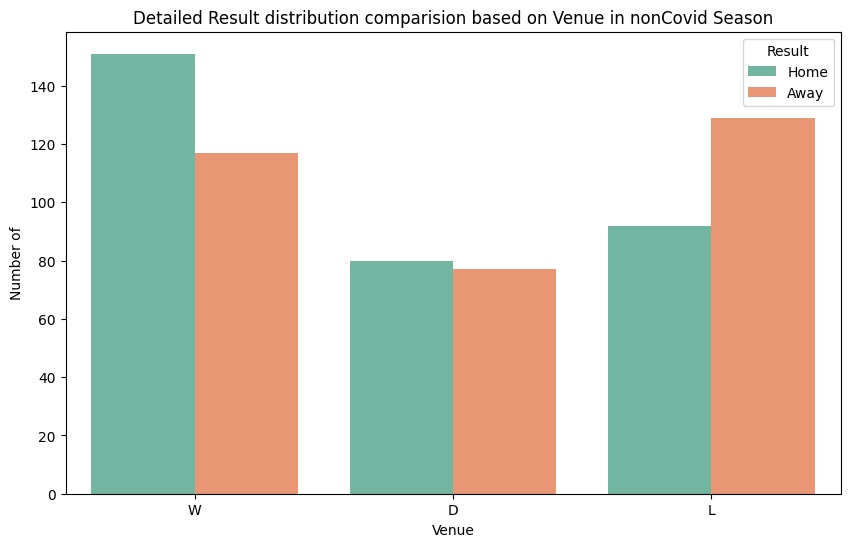

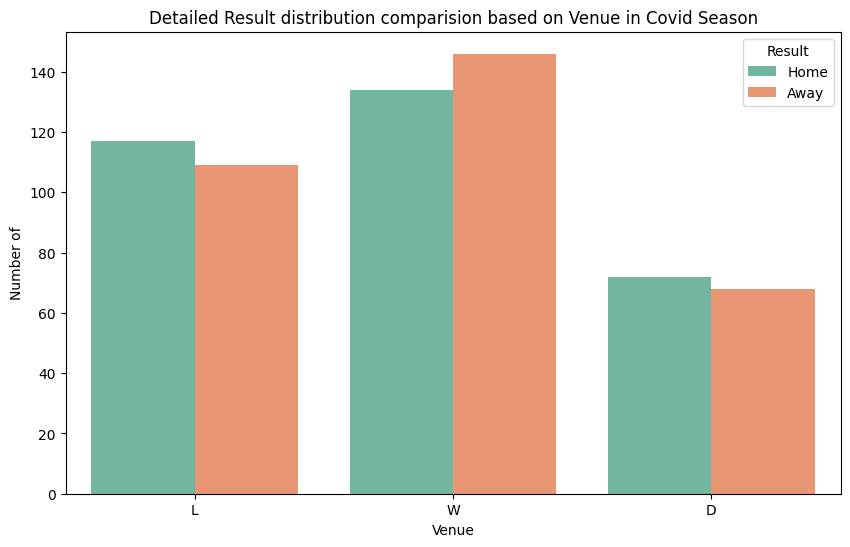

In [40]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Result', hue='Venue', data=nonCovidData, palette='Set2')
plt.title('Detailed Result distribution comparision based on Venue in nonCovid Season')
plt.xlabel('Venue')
plt.ylabel('Number of')
plt.legend(title = "Result")
# Show the plot
plt.show()

plt.figure(figsize=(10, 6))

sns.countplot(x='Result', hue='Venue', data=covidData, palette='Set2')
plt.title('Detailed Result distribution comparision based on Venue in Covid Season')
plt.xlabel('Venue')
plt.ylabel('Number of')
plt.legend(title = "Result")
# Show the plot
plt.show()